In [1]:
# Script de prueba rápida
import networkx as nx
import sys, os

sys.path.append(os.path.abspath(".."))

from src.solver import GraphColoringSolver

# 1. Crear grafo simple
g = nx.Graph()
g.add_edges_from([(0,1), (1,2), (2,3), (3,0), (0,2)]) # Un cuadrado cruzado

# 2. Inicializar Solver
# Ponemos n_colors bajo para forzar conflictos
solver = GraphColoringSolver(g, n_colors=2, pop_size=10)

print("\n--- TEST EVALUACIÓN ---")
fitness = solver.evaluate()
print("Fitness original:", fitness)

print("\n--- TEST SELECCIÓN ---")
# Deberíamos ver que los fitness de los padres seleccionados son (en promedio) mejores
parents = solver.select_tournament(k=3)
# Hack para ver el fitness de los padres seleccionados rápidamente:
# (En el código real recalcularemos el fitness en cada vuelta)
solver.population = parents 
fitness_parents = solver.evaluate()
print("Fitness padres (debería ser menor o igual):", fitness_parents)

print("\n--- TEST CRUCE ---")
offspring = solver.crossover_uniform(parents)
print("Hijo 0 (Muestra):", offspring[0])
print("Dimensiones Hijos:", offspring.shape) # Debería ser (10, 4)


--- TEST EVALUACIÓN ---
Fitness original: [2 2 2 5 2 3 2 1 3 2]

--- TEST SELECCIÓN ---
Fitness padres (debería ser menor o igual): [2 2 1 2 1 2 2 2 2 1]

--- TEST CRUCE ---
Hijo 0 (Muestra): [0 1 1 0]
Dimensiones Hijos: (10, 4)


Medium Graph Loaded
Nodes: 81
Edges: 1056

--- INICIANDO OPTIMIZACIÓN CROMÁTICA ---
--- INICIANDO (Start k=20, Pop=200, Mut=0.2, Elites=5) ---

>> Probando con 20 colores...
✅ ÉXITO con 20 colores.

>> Probando con 19 colores...
✅ ÉXITO con 19 colores.

>> Probando con 18 colores...
✅ ÉXITO con 18 colores.

>> Probando con 17 colores...
✅ ÉXITO con 17 colores.

>> Probando con 16 colores...
✅ ÉXITO con 16 colores.

>> Probando con 15 colores...
✅ ÉXITO con 15 colores.

>> Probando con 14 colores...
✅ ÉXITO con 14 colores.

>> Probando con 13 colores...
❌ FALLO con 13 colores.

✅ RESULTADO FINAL: El número cromático encontrado es 14


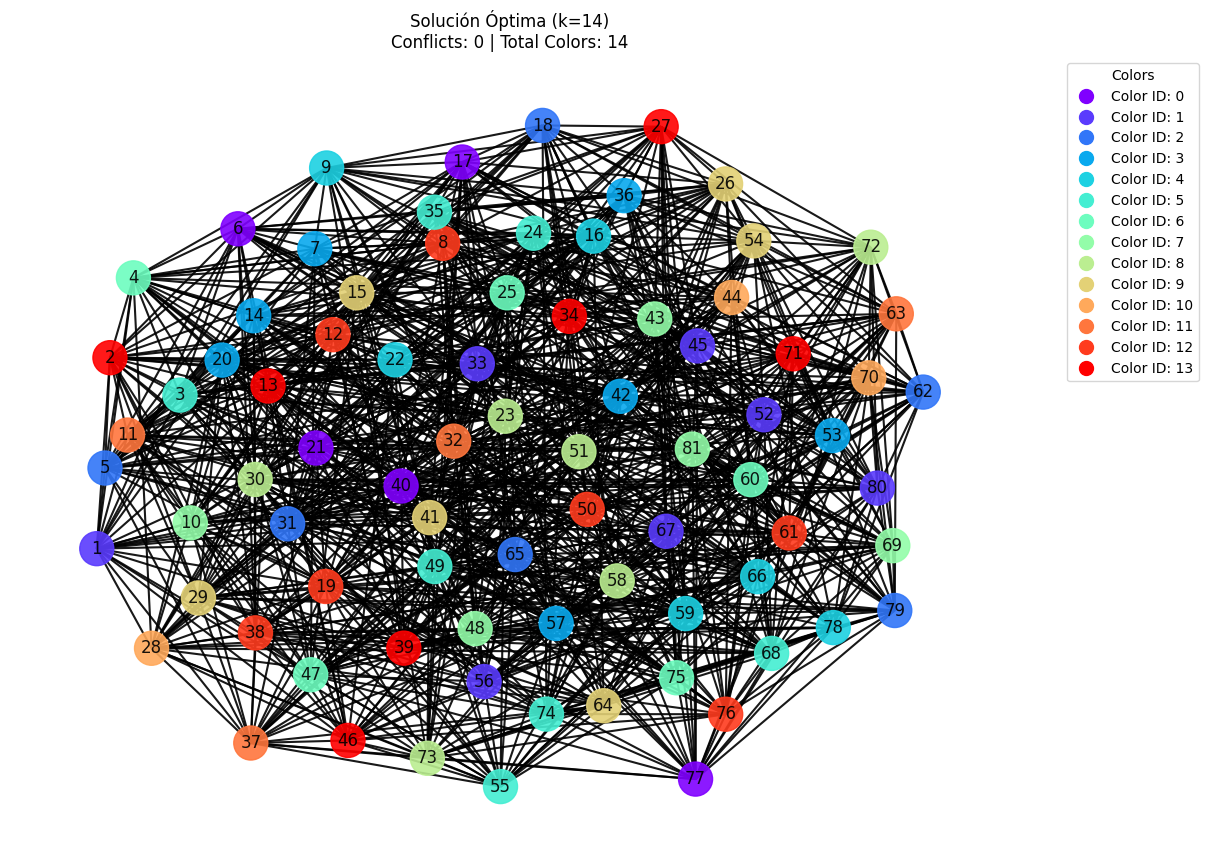

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Asegurar importaciones
sys.path.append(os.path.abspath(".."))
from src.utils import loading_graphs, plot_colored_graph
# Importamos tu nuevo optimizador cromático
from src.optimizer import find_optimal_coloring

# 1. Cargar Grafo
path = "../data/queen9_9.col" 
graph = loading_graphs(path, size="Medium")

# 2. EJECUTAR BÚSQUEDA AUTOMÁTICA (CROMÁTICA)
# En lugar de fijar 16 y cruzar los dedos, le decimos:
# "Empieza en 20 y baja hasta que no puedas más".
print("\n--- INICIANDO OPTIMIZACIÓN CROMÁTICA ---")

# start_colors=20 es un buen punto de partida seguro para queen9_9 (cuyo óptimo es 10)
best_genes, min_k = find_optimal_coloring(
    graph, 
    start_colors=20, 
    pop_size=200, 
    max_generations=2000,
    mutation_rate=0.2,
    elitism_count=5
)

# 3. Resultados Finales
print(f"\n✅ RESULTADO FINAL: El número cromático encontrado es {min_k}")

# 4. Visualizar Solución
if best_genes is not None:
    # Creamos el objeto falso para que plot_colored_graph funcione
    class ResultObj:
        def __init__(self, g, c): 
            self.genes = g
            self.conflicts = c # Si es la solución óptima, conflictos es 0
    
    # Dibujamos el grafo con los colores mínimos encontrados
    plot_colored_graph(graph, ResultObj(best_genes, 0), title=f"Solución Óptima (k={min_k})")
else:
    print("❌ No se encontró ninguna solución válida (revisa start_colors o max_generations).")